In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 3.1 Data Preprocess

In [2]:
original_data = pd.read_csv("OnlineNewsPopularity.csv")
col_names = original_data.columns.tolist()
for index,value in enumerate(col_names):
    col_names[index]= value.replace(" ","")
    
original_data.columns=col_names 

In [3]:
drop_list = ['url',
             'timedelta',
             'n_non_stop_words',
             'n_non_stop_unique_tokens',
             'weekday_is_monday',
             'weekday_is_tuesday',
             'weekday_is_wednesday', 
             'weekday_is_thursday', 
             'weekday_is_friday',
             'weekday_is_saturday', 
             'weekday_is_sunday',
             'kw_max_max',
             'kw_max_min',
             'kw_max_avg',
             'self_reference_min_shares',
             'self_reference_max_shares']
extracted_data = original_data.drop(labels=drop_list, axis = 1)

In [4]:
extracted_data.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,8.000000,3.000000,1.000000,0.000000,4.664082,7.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,14.000000,4.000000,4.000000,1.000000,4.854839,9.000000,0.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,304.000000,116.000000,128.000000,91.000000,8.041534,10.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [5]:
# 1st quartile (25%)
Q1 = np.percentile(extracted_data["shares"], 25)
# 3rd quartile (75%)
Q3 = np.percentile(extracted_data["shares"], 75)
# Interquartile range (IQR)
IQR = Q3 - Q1

# outlier step
outlier_step = 3 * IQR
upper_boundary = Q3 + outlier_step
extracted_data = extracted_data[extracted_data["shares"] <= upper_boundary]
extracted_data.reset_index(drop=True)

extracted_data.loc[extracted_data["n_unique_tokens"]==701,"n_unique_tokens"] = 0.701

For classification, a new lable is created based on the number of shares. 1 means good news and 0 means bad news 

In [6]:
extracted_data["popularity"] = np.where(extracted_data["shares"]>=1300,1,0)

final_data = extracted_data.drop(labels=["shares"], axis = 1)

final_data["popularity"].value_counts()

1    20129
0    16750
Name: popularity, dtype: int64

normalization and split the dataset 

In [7]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
scaler_list = final_data.columns.tolist()
data = scaler.fit_transform(final_data)
data = pd.DataFrame(data,columns=scaler_list)
data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,popularity
0,0.476190,0.028207,0.663594,0.013158,0.017241,0.007812,0.0,0.582024,0.444444,0.0,...,0.100000,0.7,0.650000,0.400,0.800000,0.500000,0.406250,0.000000,0.187500,0.0
1,0.333333,0.032844,0.604743,0.009868,0.008621,0.007812,0.0,0.611043,0.333333,0.0,...,0.033333,0.7,0.881250,0.875,0.900000,0.000000,0.500000,1.000000,0.000000,0.0
2,0.333333,0.027177,0.575130,0.009868,0.008621,0.007812,0.0,0.546334,0.555556,0.0,...,0.100000,1.0,0.533333,0.200,0.866667,0.000000,0.500000,1.000000,0.000000,1.0
3,0.333333,0.068393,0.503788,0.029605,0.000000,0.007812,0.0,0.547768,0.666667,0.0,...,0.136364,0.8,0.630303,0.400,0.833333,0.000000,0.500000,1.000000,0.000000,0.0
4,0.523810,0.138073,0.415646,0.062500,0.163793,0.156250,0.0,0.582331,0.666667,0.0,...,0.033333,1.0,0.779808,0.500,0.950000,0.454545,0.568182,0.090909,0.136364,0.0


In [8]:
from sklearn.model_selection import train_test_split

train_set = data.drop(labels=["popularity"],axis=1)
test_set = data["popularity"]

X_train,X_test,y_train,y_test = train_test_split(train_set,test_set,test_size=0.2,random_state=42)

# 3.2	Machine Learning Algorithms 

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

lr_clf = LogisticRegression(random_state=42, max_iter=1000)
knn_clf = KNeighborsClassifier()
svm_clf = SVC(random_state=42)
dec_clf = DecisionTreeClassifier(random_state=42)

classifiers = [lr_clf, knn_clf, svm_clf, dec_clf]

for clf in classifiers:
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.6472342733188721
KNeighborsClassifier 0.6090021691973969
SVC 0.6420824295010846
DecisionTreeClassifier 0.5677874186550976


# 3.3  Performance Optimization

3.3.1 Outliers Handling

<AxesSubplot:>

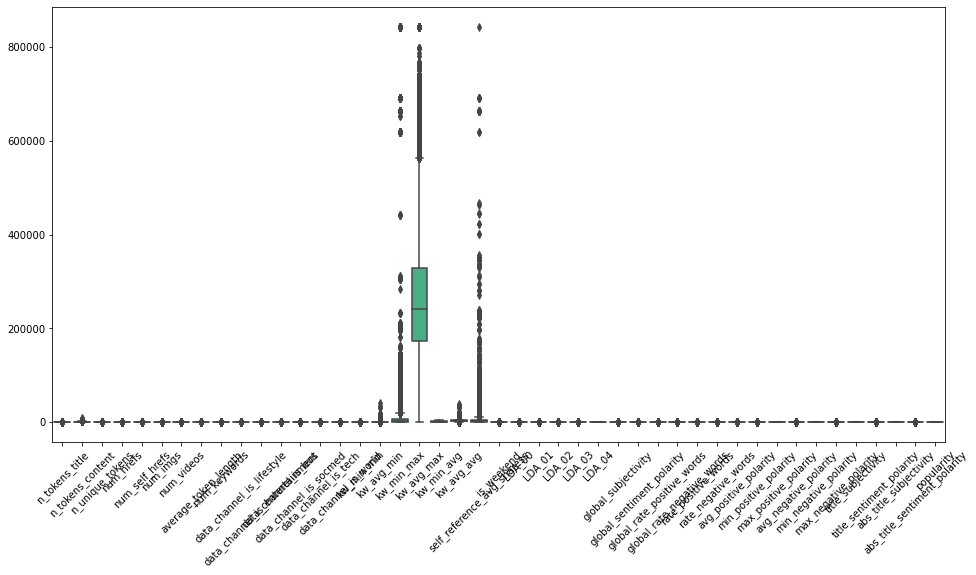

In [10]:
import seaborn as sns

plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
sns.boxplot(data = final_data)

In [11]:
df = final_data  # remove all the outliers from features

df_new = df.mask((df - df.mean()).abs() > 2 * df.std())

final_data_new = df_new.fillna(df_new.mean())

final_data_new.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,popularity
count,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.0,...,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000,36879.000000
mean,10.372110,481.345614,0.544021,9.114930,2.840562,3.056136,0.516741,4.688121,7.294586,0.0,...,0.084735,0.784521,-0.265152,-0.519999,-0.091475,0.228418,0.064366,0.341817,0.117016,0.545812
std,1.769917,312.400636,0.093925,6.685493,2.235255,4.412634,1.026277,0.274508,1.812208,0.0,...,0.043691,0.199751,0.088009,0.289563,0.052072,0.259969,0.175059,0.189089,0.158696,0.497904
min,7.000000,0.000000,0.260995,0.000000,0.000000,0.000000,0.000000,3.600000,4.000000,0.0,...,0.000000,0.285714,-0.511111,-1.000000,-0.291667,0.000000,-0.450000,0.000000,0.000000,0.000000
25%,9.000000,249.000000,0.480019,4.000000,1.000000,1.000000,0.000000,4.503497,6.000000,0.0,...,0.050000,0.600000,-0.316667,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,0.000000
50%,10.000000,414.000000,0.544021,7.000000,2.840562,1.000000,0.000000,4.685950,7.000000,0.0,...,0.100000,0.800000,-0.265152,-0.500000,-0.100000,0.125000,0.000000,0.500000,0.000000,1.000000
75%,12.000000,646.000000,0.604061,12.000000,4.000000,3.056136,1.000000,4.856780,9.000000,0.0,...,0.100000,1.000000,-0.202778,-0.300000,-0.050000,0.454545,0.125000,0.500000,0.200000,1.000000
max,14.000000,1481.000000,0.800926,32.000000,11.000000,20.000000,9.000000,6.197802,10.000000,0.0,...,0.227273,1.000000,-0.012500,0.000000,0.000000,0.916667,0.591667,0.500000,0.591667,1.000000


In [12]:
from sklearn.preprocessing import MinMaxScaler   
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
scaler_list_new = final_data_new.columns.tolist()
data_new = scaler.fit_transform(final_data_new)
data_new = pd.DataFrame(data_new,columns=scaler_list)

train_set_new = data_new.drop(labels=["popularity"],axis=1)
test_set_new = data_new["popularity"]

X_train_new,X_test_new,y_train_new,y_test_new = train_test_split(train_set_new,test_set_new,test_size=0.2,random_state=42)

In [13]:
for clf in classifiers:
    clf.fit(X_train_new,y_train_new)
    y_pred_new = clf.predict(X_test_new)
    print(clf.__class__.__name__, accuracy_score(y_test_new, y_pred_new))

LogisticRegression 0.6321854663774403
KNeighborsClassifier 0.5772776572668112
SVC 0.6446583514099783
DecisionTreeClassifier 0.563177874186551


3.3.2 HyperParameter Tuning

KNN: manual setting the number of neighbors  

In [14]:
for n in range(7,15):
    knn_clf = KNeighborsClassifier(n_neighbors=n)
    knn_clf.fit(X_train,y_train)
    y_pred = knn_clf.predict(X_test)
    print(f"when n_neighbors is : {n}, the accuracy_score is {accuracy_score(y_test,y_pred)}")
    print("-"*40)

when n_neighbors is : 7, the accuracy_score is 0.6129338394793926
----------------------------------------
when n_neighbors is : 8, the accuracy_score is 0.6095444685466378
----------------------------------------
when n_neighbors is : 9, the accuracy_score is 0.6164587852494577
----------------------------------------
when n_neighbors is : 10, the accuracy_score is 0.6079175704989154
----------------------------------------
when n_neighbors is : 11, the accuracy_score is 0.6188991323210412
----------------------------------------
when n_neighbors is : 12, the accuracy_score is 0.6122559652928417
----------------------------------------
when n_neighbors is : 13, the accuracy_score is 0.6217462039045553
----------------------------------------
when n_neighbors is : 14, the accuracy_score is 0.6183568329718004
----------------------------------------


Decision Tree: Grid Search

In [15]:
from sklearn.model_selection import GridSearchCV

params = {'min_samples_leaf': list(range(50,58,3)), 'max_depth': [4,6,8]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

print(grid_search_cv.best_estimator_)

y_pred = grid_search_cv.predict(X_test)
print(accuracy_score(y_test,y_pred))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
DecisionTreeClassifier(max_depth=6, min_samples_leaf=56, random_state=42)
0.6324566160520607


SVM: Random Search with rbf kernel

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
 
param_distributions = {"gamma": reciprocal(0.02,0.04),"C": uniform(1,10)}
rnd_search_cv = RandomizedSearchCV(SVC(random_state=42), param_distributions, n_iter=10, verbose=1, cv=3)
rnd_search_cv.fit(X_train[:10000], y_train[:10000])

print(rnd_search_cv.best_estimator_)

y_pred = rnd_search_cv.predict(X_test)
print(f"the accuracy with rbf kernel is {accuracy_score(y_test,y_pred)}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
SVC(C=9.201447899676177, gamma=0.03654168552245679, random_state=42)
the accuracy with rbf kernel is 0.6372017353579176


SVM: Random Search with poly kernel

In [17]:
param_distributions = {"degree": [2,3],"C": uniform(5,10),"coef0":[3,5,7]}
rnd_search_cv = RandomizedSearchCV(SVC(kernel="poly",random_state=42), param_distributions, n_iter=10, verbose=1, cv=3)
rnd_search_cv.fit(X_train[:10000], y_train[:10000])

print(rnd_search_cv.best_estimator_)

y_pred = rnd_search_cv.predict(X_test)
print(f"the accuracy with poly kernel is {accuracy_score(y_test,y_pred)}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
SVC(C=5.386450695863251, coef0=7, degree=2, kernel='poly', random_state=42)
the accuracy with poly kernel is 0.646556399132321


3.3.3 Ensemble Learning Algorithms

Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(random_state=42)

params = {'n_estimators': list(range(80,111,10)), 'min_samples_leaf': list(range(45,56,3)), 'max_depth': [6,8]}
grid_search_cv = GridSearchCV(rnd_clf, params, verbose=1, cv=3)
grid_search_cv.fit(X_train[:10000], y_train[:10000])

print(grid_search_cv.best_estimator_)

y_pred = grid_search_cv.predict(X_test)
print(f"the accuracy for RandomForest is {accuracy_score(y_test,y_pred)}")

Fitting 3 folds for each of 32 candidates, totalling 96 fits
RandomForestClassifier(max_depth=6, min_samples_leaf=51, n_estimators=110,
                       random_state=42)
the accuracy for RandomForest is 0.6503524945770065


AdaBoosting

In [19]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(random_state=42)

params = {'n_estimators': list(range(60,91,10)),'learning_rate':[0.4,0.5,0.6]}
grid_search_cv = GridSearchCV(ada_clf, params, verbose=1, cv=3)
grid_search_cv.fit(X_train[:10000], y_train[:10000])

print(grid_search_cv.best_estimator_)

y_pred = grid_search_cv.predict(X_test)
print(f"the accuracy for RandomForest is {accuracy_score(y_test,y_pred)}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
AdaBoostClassifier(learning_rate=0.5, n_estimators=80, random_state=42)
the accuracy for RandomForest is 0.6549620390455532


VotingClassifier

In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [21]:
from sklearn.ensemble import VotingClassifier

lr_clf = LogisticRegression(solver="lbfgs",max_iter=1000,random_state=42)
rnd_clf = RandomForestClassifier(max_depth=8, min_samples_leaf=50, n_estimators=90, random_state=42)
svm_clf = SVC(probability=True,random_state=42)
ada_clf = AdaBoostClassifier(learning_rate=0.5, n_estimators=80, random_state=42)

Hard - VotingClassifier

In [22]:
voting_clf_soft = VotingClassifier(estimators=[('lr', lr_clf), ('rnd', rnd_clf), ('svm',svm_clf), ('ada',ada_clf)])

voting_clf_soft.fit(X_train[:10000], y_train[:10000])
y_pred = voting_clf_soft.predict(X_test)
print(f"the hard_voting accuracy is: {accuracy_score(y_test, y_pred)}")

the hard_voting accuracy is: 0.6507592190889371


Soft - VotingClassifier

In [23]:
voting_clf_soft = VotingClassifier(estimators=[('lr', lr_clf), ('rnd', rnd_clf), ('svm',svm_clf), ('ada',ada_clf)],voting='soft')

voting_clf_soft.fit(X_train[:10000], y_train[:10000])
y_pred = voting_clf_soft.predict(X_test)
print(f"the soft_voting accuracy is: {accuracy_score(y_test, y_pred)}")

the soft_voting accuracy is: 0.6469631236442517


3.3.4 Feature Engineering

Feature_Importance

In [24]:
rnd_clf = RandomForestClassifier(max_depth=8, min_samples_leaf=50, 
                                 n_estimators=90, random_state=42)
rnd_clf.fit(X_train,y_train)

feature_importance = rnd_clf.feature_importances_

feature_name = X_train.columns.tolist()

arrySer=pd.Series(feature_importance,index=feature_name).sort_values(ascending=False)
print(arrySer)

kw_avg_avg                       0.108214
is_weekend                       0.103666
self_reference_avg_sharess       0.083683
data_channel_is_entertainment    0.074257
LDA_02                           0.060086
kw_min_avg                       0.050225
data_channel_is_world            0.041963
data_channel_is_tech             0.033674
data_channel_is_socmed           0.032077
LDA_04                           0.029502
LDA_00                           0.027230
LDA_01                           0.026688
kw_avg_min                       0.025353
n_unique_tokens                  0.023295
n_tokens_content                 0.021937
kw_avg_max                       0.021639
num_hrefs                        0.019697
num_imgs                         0.018868
global_sentiment_polarity        0.017349
min_positive_polarity            0.017312
LDA_03                           0.013609
rate_positive_words              0.013330
global_rate_positive_words       0.012729
kw_min_min                       0

In [25]:
import time

time_start = time.time()
rnd_clf.fit(X_train,y_train)
time_end = time.time()
time_c= time_end - time_start
y_pred = rnd_clf.predict(X_test)

print('time cost for original data set: ', time_c, 's')
print('the accuracy for original data set: ', accuracy_score(y_test,y_pred)*100, '%')

time cost for original data set:  3.8026773929595947 s
the accuracy for original data set:  65.10303687635574 %


In [26]:
low_importance_list = ["data_channel_is_lifestyle","title_subjectivity","abs_title_sentiment_polarity","abs_title_subjectivity",
                      "max_positive_polarity","num_videos","max_negative_polarity","n_tokens_title","title_sentiment_polarity",
                      "min_negative_polarity","num_self_hrefs"]
drop_list_new = []

In [27]:
for feature in low_importance_list:
    drop_list_new.append(feature)
    extracted_X_train = X_train.drop(labels=drop_list_new,axis=1)
    extracted_X_test = X_test.drop(labels=drop_list_new,axis=1)
    
    time_start = time.time()
    rnd_clf.fit(extracted_X_train,y_train)
    time_end = time.time()
    time_c= time_end - time_start
    y_pred = rnd_clf.predict(extracted_X_test)
    
    print(f'when drop {len(drop_list_new)} features')
    print('time cost for extracted data set: ', time_c, 's')
    print('the accuracy for extracted data set: ', accuracy_score(y_test,y_pred)*100, '%')
    print("--" * 20)

when drop 1 features
time cost for extracted data set:  4.00550389289856 s
the accuracy for extracted data set:  65.00813449023862 %
----------------------------------------
when drop 2 features
time cost for extracted data set:  3.9415900707244873 s
the accuracy for extracted data set:  65.15726681127983 %
----------------------------------------
when drop 3 features
time cost for extracted data set:  3.9880518913269043 s
the accuracy for extracted data set:  65.22505422993493 %
----------------------------------------
when drop 4 features
time cost for extracted data set:  4.036044359207153 s
the accuracy for extracted data set:  65.00813449023862 %
----------------------------------------
when drop 5 features
time cost for extracted data set:  4.1440722942352295 s
the accuracy for extracted data set:  65.08947939262472 %
----------------------------------------
when drop 6 features
time cost for extracted data set:  4.0973358154296875 s
the accuracy for extracted data set:  65.19793

PCA

when dimension is reduced to 15 features, there are 10% information loss


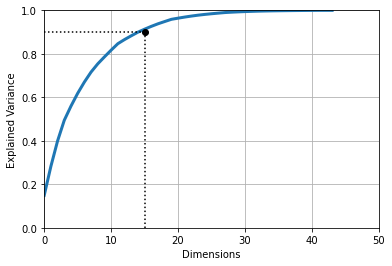

In [28]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.90) 
print(f"when dimension is reduced to {d} features, there are 10% information loss")

plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 50, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.9], "k:")
plt.plot([0, d], [0.9, 0.9], "k:")
plt.plot(d, 0.9, "ko")
plt.grid(True)
plt.show()

In [29]:
pca = PCA(n_components=0.9)
train_set_reduced = pca.fit_transform(train_set)

reduced_X_train,reduced_X_test,y_train,y_test = train_test_split(train_set_reduced,test_set,test_size=0.2,random_state=42)

In [30]:
time_start = time.time()
ada_clf.fit(X_train,y_train)
time_end = time.time()
time_c= time_end - time_start
y_pred = ada_clf.predict(X_test)

print('time cost for original data set: ', time_c, 's')
print('the accuracy for original data set: ', accuracy_score(y_test,y_pred)*100, '%')

time cost for original data set:  5.853222846984863 s
the accuracy for original data set:  65.27928416485899 %


In [31]:
time_start = time.time()
ada_clf.fit(reduced_X_train,y_train)
time_end = time.time()
time_c= time_end - time_start
y_pred = ada_clf.predict(reduced_X_test)

print('time cost for reduced dimension data set: ', time_c, 's')
print('the accuracy for reduced dimension data set: ', accuracy_score(y_test,y_pred)*100, '%')

time cost for reduced dimension data set:  4.568201541900635 s
the accuracy for reduced dimension data set:  63.19143167028199 %


## 3.4   Performance Analysis

Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix
lr_clf.fit(X_train,y_train)
y_pred = lr_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[1869, 1432],
       [1170, 2905]], dtype=int64)

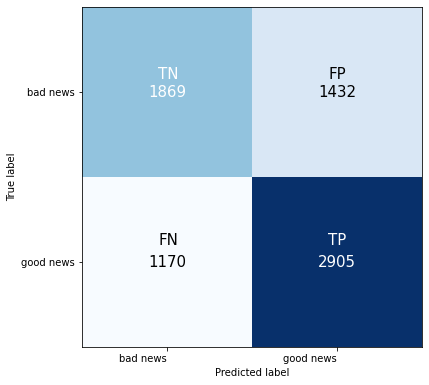

In [33]:
classes = ["bad news","good news"]
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       ylabel='True label',
       xlabel='Predicted label')

plt.setp(ax.get_xticklabels(), ha="right",rotation_mode="anchor")

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black",fontsize=15)
        
ax.text(-0.05, -0.08, 'TN', fontsize = 15,color="white") 
ax.text(0.95, -0.08, 'FP', fontsize = 15) 
ax.text(0.95, 0.9, 'TP', fontsize = 15,color="white") 
ax.text(-0.05, 0.9, 'FN', fontsize = 15) 
plt.tight_layout()
plt.show()

precision and recall 

In [34]:
precision = cm[1, 1] / (cm[0, 1] + cm[1, 1])
recall = cm[1, 1] / (cm[1, 0] + cm[1, 1])
f1 = 2 * (precision * recall) / (precision + recall)

print("precision value is ", precision)
print("recall value is ", recall)
print("f1 value is ", f1)

precision value is  0.6698178464376296
recall value is  0.7128834355828221
f1 value is  0.690679980979553


verify the calculation

In [35]:
from sklearn.metrics import precision_score, recall_score,f1_score

print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.6698178464376296
0.7128834355828221
0.690679980979553


Threshold Analysis

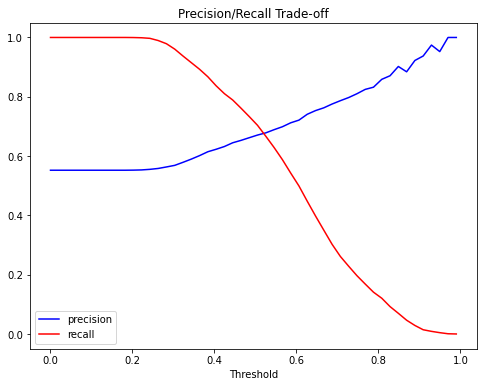

In [36]:
precision_value = []
recall_value = []
model = lr_clf = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train,y_train)              # use LogisticRegression algorithm 

for i in np.linspace(0,0.99,50):       # calculate the precision and recall value with different threshold
    probas = model.predict_proba(X_test)[:,1:]
    predictions = np.where(probas >= i,1,0)   
    errors = predictions-y_test.to_numpy().reshape(-1,1)    
    fp = np.count_nonzero(errors == 1)
    fn = np.count_nonzero(errors == -1)
    tp = np.sum(np.where(np.logical_and(errors == 0, predictions == 1),1,0))
    tn = np.sum(np.where(np.logical_and(errors == 0, predictions == 0),1,0))
    precision = tp / np.sum(tp + fp)
    precision_value.append(precision)
    recall = tp / np.sum(tp + fn)
    recall_value.append(recall)
    
plt.figure(figsize=(8,6))   # plot the trade off diagramm
plt.title("Precision/Recall Trade-off")    
plt.plot(np.linspace(0,0.99,50), precision_value ,label="precision",c="b")
plt.plot(np.linspace(0,0.99,50), recall_value,label="recall",c="r")
plt.xlabel("Threshold")
plt.legend()
plt.show()

Profit Graph: assume when an article is predicted as good news, the true label is good news, then the company can earn 300 euros, but if true label is bad news, they will lose 250 euros; if an article is predicted as bad news, the true label is good news, then it will lose 50 euros, but if true label is also bad, then no gain no loss.

In [37]:
profit_tp = 300
profit_fp = -250
profit_fn = -50
profit_tn = 0

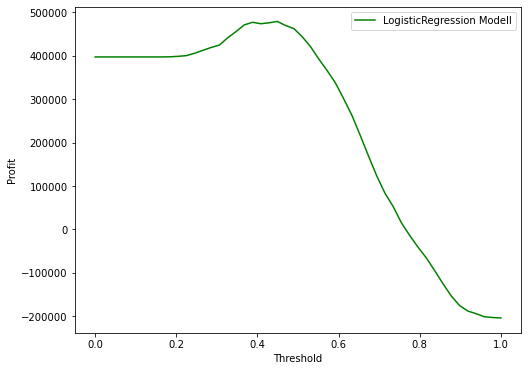

In [38]:
profits = []
for i in np.linspace(0,1,50):
    probas = model.predict_proba(X_test)[:,1:]
    predictions = np.where(probas >= i,1,0)
    
    errors = predictions-y_test.to_numpy().reshape(-1,1)
    fp = np.count_nonzero(errors == 1)
    fn = np.count_nonzero(errors == -1)
    tp = np.sum(np.where(np.logical_and(errors == 0, predictions == 1),1,0))
    tn = np.sum(np.where(np.logical_and(errors == 0, predictions == 0),1,0))
    profits.append(fp*profit_fp+fn*profit_fn+tp*profit_tp+tn*profit_tn)

plt.figure(figsize=(8,6))
plt.plot(np.linspace(0,1,50), profits,label="LogisticRegression Modell",c="g")
plt.xlabel("Threshold")
plt.ylabel("Profit")
plt.legend()
plt.show()

# 3.5	 Multiclass classification

RandomForestClassifier

In [39]:
share_label = list()
share_data = extracted_data['shares']

for share in share_data:
    if share <= 900:
        share_label.append("bad")
    elif share > 900 and share <= 1300:
        share_label.append("sufficient")
    elif share > 1300 and share <= 1800:
        share_label.append("satisfying")
    elif share > 1800 and share <= 2800:
        share_label.append("good")
    else:
        share_label.append("very good")

MultiClass_popularity = pd.DataFrame(share_label, columns=['MultiClass_popularity'])

In [40]:
scaler = MinMaxScaler()
scaler_list_multi = extracted_data.columns.tolist()
final_data_multi = scaler.fit_transform(extracted_data)
final_data_multi = pd.DataFrame(extracted_data,columns=scaler_list_multi)


data_multi = pd.concat([final_data_multi.reset_index(drop=True), MultiClass_popularity], axis=1)

data_multi.drop(labels=["popularity"], axis = 1, inplace=True)

In [41]:
data_multi["MultiClass_popularity"].value_counts()

sufficient    9791
bad           8699
very good     6865
satisfying    5954
good          5570
Name: MultiClass_popularity, dtype: int64

In [42]:
train_set_multi = data_multi.drop(labels=["MultiClass_popularity"],axis=1)
test_set_multi = data_multi["MultiClass_popularity"]

X_train_multi,X_test_multi,y_train_multi,y_test_multi = train_test_split(train_set_multi,test_set_multi,test_size=0.2,random_state=42)

In [43]:
def confusion_matrix_plot(classes,cm):

    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), ha="right",rotation_mode="anchor")

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j]),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black",fontsize=15)

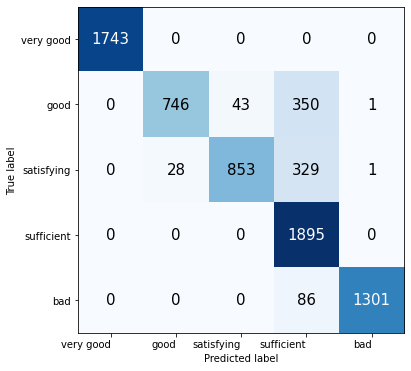

In [44]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(max_leaf_nodes=30, min_samples_split=5, n_estimators=60,random_state=42)
rnd_clf.fit(X_train_multi, y_train_multi)

y_pred_multi = rnd_clf.predict(X_test_multi)
confusion_matrix_rnd = confusion_matrix(y_test_multi, y_pred_multi)

classes = ["very good","good","satisfying","sufficient","bad",]

confusion_matrix_plot(classes,confusion_matrix_rnd)

SVC without Regularization parameter tuning

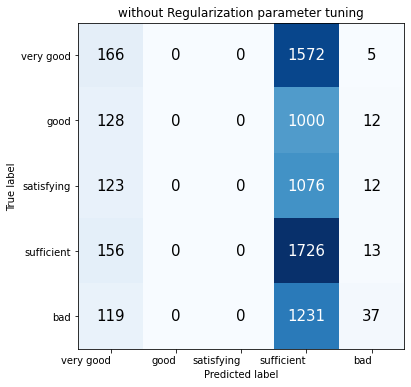

In [45]:
from sklearn.svm import SVC   # default using OneVsOne method
from sklearn.metrics import confusion_matrix

#without Regularization parameter tuning

svm_clf_ori = SVC()
svm_clf_ori.fit(X_train_multi[:8000], y_train_multi[:8000])

y_pred_svm = svm_clf_ori.predict(X_test_multi)
confusion_matrix_ori = confusion_matrix(y_test_multi, y_pred_svm)

confusion_matrix_plot(classes,confusion_matrix_ori)
plt.title("without Regularization parameter tuning")
plt.show()

SVC with Regularization parameter tuning

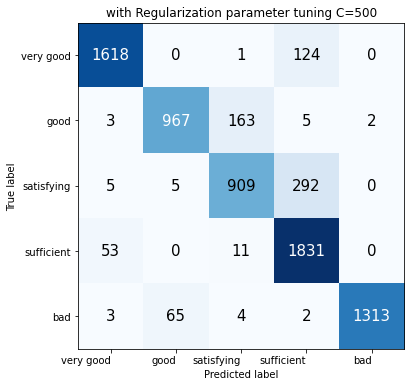

In [46]:
svm_clf_opt = SVC(C=500,random_state=42)

svm_clf_opt.fit(X_train_multi[:8000], y_train_multi[:8000])

y_pred_svm = svm_clf_opt.predict(X_test_multi)
confusion_matrix_opt = confusion_matrix(y_test_multi, y_pred_svm)

confusion_matrix_plot(classes,confusion_matrix_opt)
plt.title("with Regularization parameter tuning C=500")
plt.show()

OneVsOne

Text(0.5, 1.0, 'OneVsOne')

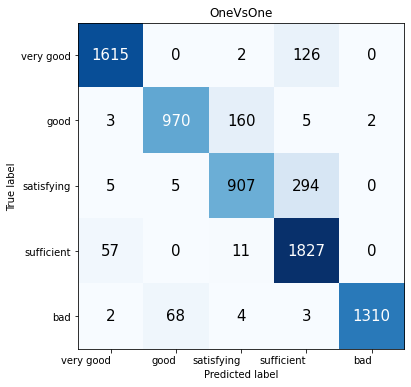

In [47]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(svm_clf_opt)
ovo_clf.fit(X_train_multi[:8000], y_train_multi[:8000])
y_pred_ovo = ovo_clf.predict(X_test_multi)
confusion_matrix_ovo = confusion_matrix(y_test_multi, y_pred_ovo)

confusion_matrix_plot(classes,confusion_matrix_ovo)
plt.title("OneVsOne")